In [ ]:
#Instalamos el paquete que nos permite darle formato a las ecuaciones
# !pip install pylatexenc

In [ ]:

#  Librerias 
import numpy as np
import pandas as pd
import sympy as sym
from sklearn.metrics import r2_score 

import matplotlib.pyplot as plt


In [ ]:
def getPol(p1):
  xx = sym.Symbol('x')
  pol = np.zeros((1))
  polc = 0
  for i in range(len(p1)):
    pol = xx**i*np.round(p1[i],3)
    polc += pol
  return  polc

In [ ]:
rad = pd.read_csv('/content/rad.txt')

Text(0, 0.5, 'Rad ')

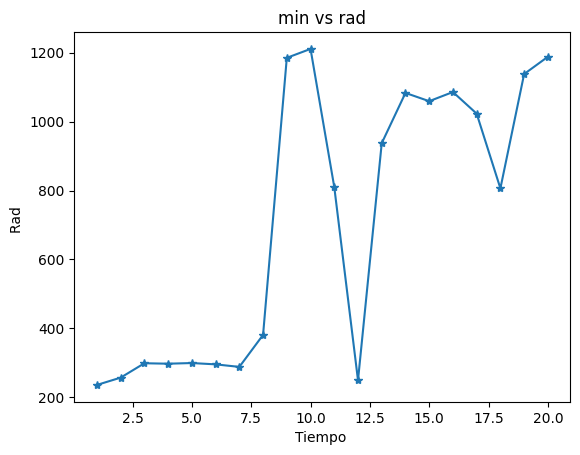

In [ ]:
min = np.arange(1,21)
plt.title ('min vs rad') 
plt.plot(min,rad.rad,'*-')
plt.xlabel ('Tiempo ')
plt.ylabel ('Rad ')

[ 2.32988906e-03 -4.13680894e-02 -1.31251489e+00  3.34811812e+01
 -1.46921950e+02  3.96691349e+02]
0.6557936402018314


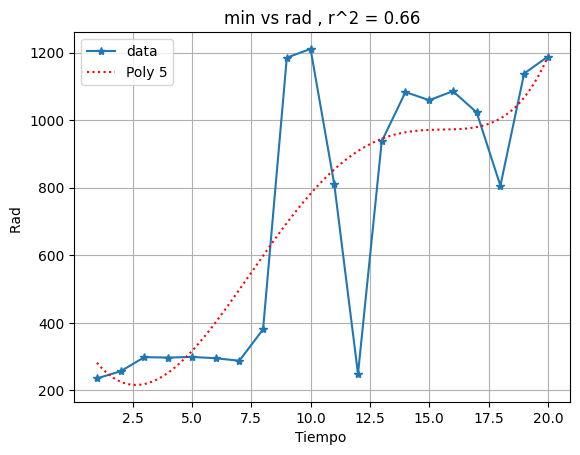

Polinomio:
 	 y5= 0.002*x**5 - 0.041*x**4 - 1.313*x**3 + 33.481*x**2 - 146.922*x + 396.691


In [ ]:

# x = np . array ([0 ,0.5 ,1 ,1.5 ,2 ,2.5])
# y = np . array ([0 ,20.5 ,31.36 ,36.25 ,30.41 ,28.23])
# y = np.array([56,113,181,214])
# x = np.array([1,5,20,40])
x = min
y = rad.rad

k = 5
xs = np.linspace (np.min(x) ,np.max(x),200)
p = np.polyfit (x ,y ,k)
mymodel = np.poly1d(np.polyfit(x, y,k))
print(p)
print(r2_score(y, mymodel(x)))
r2 = r2_score(y, mymodel(x))
fig = plt . figure ()
plt.plot( x,y , '*-',label ='data')

plt.plot( xs, np.polyval (p , xs ) , ':r', label =f'Poly {k}')
plt.legend()
plt.xlabel ('Tiempo ')
plt.ylabel ('Rad ')
plt.title (f'min vs rad , r^2 = {np.round(r2,2)}')
plt.grid ()
plt.show ()
p1 =p[::-1]
print(f"Polinomio:\n \t y{k}= {getPol(p1)}")



In [ ]:
p1 =p[::-1]

getPol(p1) # Polinomio de la grafica roja 

0.002*x**5 - 0.041*x**4 - 1.313*x**3 + 33.481*x**2 - 146.922*x + 396.691

Aproximación polinomial de orden M , con $x_i$ de orden N

Por numpy y paso a paso.

Formula:

|   |   |
|---|---|
| $∑_{i=1}^{n} \left\{a_0+x_i\cdot a_1+x_i^2\cdot a_2+x_i^3\cdot a_3+ x_i^4\cdot a_4+ x_i^5\cdot a_5+⋯ + x_n^m\cdot a_m = y_i \right\}$  |  ec.1 |
|  $∑_{i=1}^{n} \left\{x_i \cdot a_0+x_i^2\cdot a_1+x_i^3\cdot a_2+x_i^4\cdot a_3+ x_i^5\cdot a_4+ x_i^6\cdot a_5+⋯ + x_n^{m+1}\cdot a_m =x_i \cdot  y_i \right\}$|  ec.2 |
| $∑_{i=1}^{n} \left\{x_i^2 \cdot a_0+x_i^3\cdot a_1+x_i^4\cdot a_2+x_i^5\cdot a_3+ x_i^6\cdot a_4+ x_i^7\cdot a_5+⋯ + x_n^{m+2}\cdot a_m =x_i^2 \cdot  y_i \right\}$   |  ec.3 |
| $∑_{i=1}^{n} \left\{x_i^3 \cdot a_0+x_i^4\cdot a_1+x_i^5\cdot a_2+x_i^6\cdot a_3+ x_i^7\cdot a_4+ x_i^8\cdot a_5+⋯ + x_n^{m+3}\cdot a_m =x_i^3 \cdot  y_i \right\}$   |  ec.4 |
| $∑_{i=1}^{n} \left\{x_i^4 \cdot a_0+x_i^5\cdot a_1+x_i^6\cdot a_2+x_i^7\cdot a_3+ x_i^8\cdot a_4+ x_i^9\cdot a_5+⋯ + x_n^{m+4}\cdot a_m =x_i^4 \cdot  y_i \right\}$   |  ec.5 |
| $∑_{i=1}^{n} \left\{x_i^5 \cdot a_0+x_i^6\cdot a_1+x_i^7\cdot a_2+x_i^8\cdot a_3+ x_i^9\cdot a_4+ x_i^{10}\cdot a_5+⋯ + x_n^{m+5}\cdot a_m =x_i^5 \cdot  y_i \right\}$   |  ec.6 |
|  $$\vdots$$  |  $\vdots$ |
|   $∑_{i=1}^{n} \left\{x_i^{m} \cdot a_{m-5}+x_i^{m+1}\cdot a_{m-4}+x_i^{m+2}\cdot a_{m-3}+x_i^{m+3}\cdot a_{m-2}+ x_i^{m+4}\cdot a_{m-1}+ ⋯ + x_n^{2m}\cdot a_m =x_i^m \cdot  y_i \right\}$   |  ec.k |

Solucionando el sistema de ecuaciones obtenemos los coeficientes del polinomio que aproxima los datos (x,y).

$$\begin{equation}
\begin{pmatrix}
N & \sum_i^n x_i & \cdots & \sum_i^n x_i^m\\
\sum_i^n x_i & \sum_i^n x_i^2 & \cdots & \sum_i^n x_i^{m+1}\\
\vdots & \vdots & \ddots & \vdots\\
\sum_i^n x_i^m & \sum_i^n x_i^{m+1} & \cdots & \sum_i^n x_i^{2m}
\end{pmatrix} ⋅ \begin{pmatrix} a_0 \\ a_1\\ \vdots \\  a_m \end{pmatrix} = \begin{pmatrix} y_i \\ x_i \cdot y_i\\ \vdots \\  x_i^m \cdot y_i \end{pmatrix} 
\end{equation}$$  

Al solucionar obtenemos el vector de coeficientes $a_i$, para formar el polinomio de grado N.

$y_n = a_0+x_1⋅a_1+x_2^2⋅a_2+x_3^3⋅a_3+x_4^4⋅a_4+x_5^5⋅a_5+⋯+x_n^n⋅a_n$


In [ ]:
n= k+1
b = np.ones((1,n))
#  Vector b
for i in range(n):
  b[0][i]= np.sum((x**i)*y)

a = np.zeros((n,n))

#  Matriz A
for i in range(n):
  for k in range(n):
    a[i][k] = np.sum(x**(k+i))
    # print(k+i)
  # print("\n")

#  Solucion del sistema A*x =b
xs = np.linalg.solve(a, b.T)

xx = sym.Symbol('x')


pol1 = getPol(xs)
pol1[0]


0.002*x**5 - 0.041*x**4 - 1.313*x**3 + 33.481*x**2 - 146.922*x + 396.691

In [ ]:
p1 =p[::-1]

getPol(p)



396.691*x**5 - 146.922*x**4 + 33.481*x**3 - 1.313*x**2 - 0.041*x + 0.002

In [ ]:
#  Matrix A
a
a[0][0]

20.0

In [ ]:
# Vector b.T
b.T

array([[1.41292100e+04],
       [1.83762360e+05],
       [2.74660216e+06],
       [4.41067031e+07],
       [7.41594961e+08],
       [1.28756526e+10]])

In [ ]:
#  Solucion de coeficientes
xs

array([[ 3.96691349e+02],
       [-1.46921950e+02],
       [ 3.34811812e+01],
       [-1.31251489e+00],
       [-4.13680894e-02],
       [ 2.32988906e-03]])

In [ ]:
#  Coeficientes en forma de polinomio 
print(f"y{k}= {pol1[0]}")

y5= 0.002*x**5 - 0.041*x**4 - 1.313*x**3 + 33.481*x**2 - 146.922*x + 396.691


Solución para los datos de radiacion solar, aproximados por polinomio de grado 5

$$y_{5}= 0.002*x^5 - 0.041*x^4 - 1.313*x^3 + 33.481*x^2 - 146.922*x + 396.691$$